# EDA

## Extract MySQL DB 

In [5]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Insert Database connection details
user = 'root'
password = 'binaryval1326'
host = 'localhost'
port = 3307 
database = 'nba_database'

# Create connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)


In [6]:
# Define the table name
table_name = 'betting_and_game_table'

# Query the database and load data into a DataFrame
df = pd.read_sql(f'SELECT * FROM {table_name};', con=engine)

# Display the first few rows of the DataFrame
display(df)

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY,HOME_AWAY_FGM_RATIO,HOME_AWAY_FGA_RATIO,SPREAD_DIFF,OVER_DIFF,HomeML_Prob,AwayML_Prob,2H_Spread_Diff,2H_Over_Diff
0,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,1.333333,1.400000,1.028571,0.987500,-0.5,-1.0,0.346783,0.882338,-0.5,-96.5
1,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,1.375000,1.400000,1.171429,1.046512,-0.5,-1.5,0.373301,0.869850,0.0,-103.5
2,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,1.909091,2.166666,0.789474,0.875000,-0.5,-3.0,0.869850,0.373301,0.5,-92.5
3,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,1.705882,1.357143,1.121951,0.927711,-0.5,0.5,0.876229,0.359935,7.0,-94.5
4,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,1.600000,1.769231,0.957447,1.000000,1.5,-1.5,0.896477,0.314940,0.5,-104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17108,22100241,22021,1610612748,MIA,Miami Heat,2021-11-20,MIA @ WAS,L,240,38.0,...,1.100000,1.500000,0.947368,0.913580,0.5,-3.0,0.478427,0.794582,-0.5,-107.0
17109,22100254,22021,1610612766,CHA,Charlotte Hornets,2021-11-22,CHA @ WAS,W,240,40.0,...,1.277778,2.100000,0.900000,1.032967,0.0,0.0,0.833662,0.414501,-0.5,-112.5
17110,22100321,22021,1610612750,MIN,Minnesota Timberwolves,2021-12-01,MIN @ WAS,L,240,37.0,...,2.428571,1.153846,1.216216,1.034091,-1.0,0.5,0.825526,0.428537,1.0,-112.0
17111,22100334,22021,1610612739,CLE,Cleveland Cavaliers,2021-12-03,CLE @ WAS,W,240,42.0,...,2.100000,1.875000,0.904762,0.921348,0.0,-0.5,0.808318,0.456934,-4.0,-107.0


In [7]:
print(df['GAME_DATE'].min())
print(df['GAME_DATE'].max())

2007-10-30
2021-12-20


## 1. Distribution of Key Metrics @Dani

We analyzed the distribution of various game statistics such as points scored, rebounds, assists, and more. This analysis helped us understand the typical performance metrics for winning and losing teams. By visualizing these metrics, we can identify patterns and differences in performance that are indicative of game outcomes. The focus was on:

- Points Scored: Comparison of points scored by winning vs. losing teams.
- Rebounds: Distribution of total rebounds for teams in different game outcomes.
- Assists: Analysis of assists made by winning and losing teams.
- Turnovers: Examination of turnover counts and their impact on game results.
- Field Goal Percentage: Insights into shooting efficiency for winning vs. losing teams.

## 2. Correlation Analysis @Jep

We examined correlations between different statistical measures to identify which metrics had the most influence on winning games. This included looking at various performance metrics and how they interrelate. Key areas of focus included:

- Team Shooting Accuracy: Analysis of field goal percentage, three-point shooting, and free throw efficiency.
- Turnovers and Assists: Relationship between turnovers, assists, and game results.
- Effective Metrics: Effective field goal percentage and other advanced metrics.


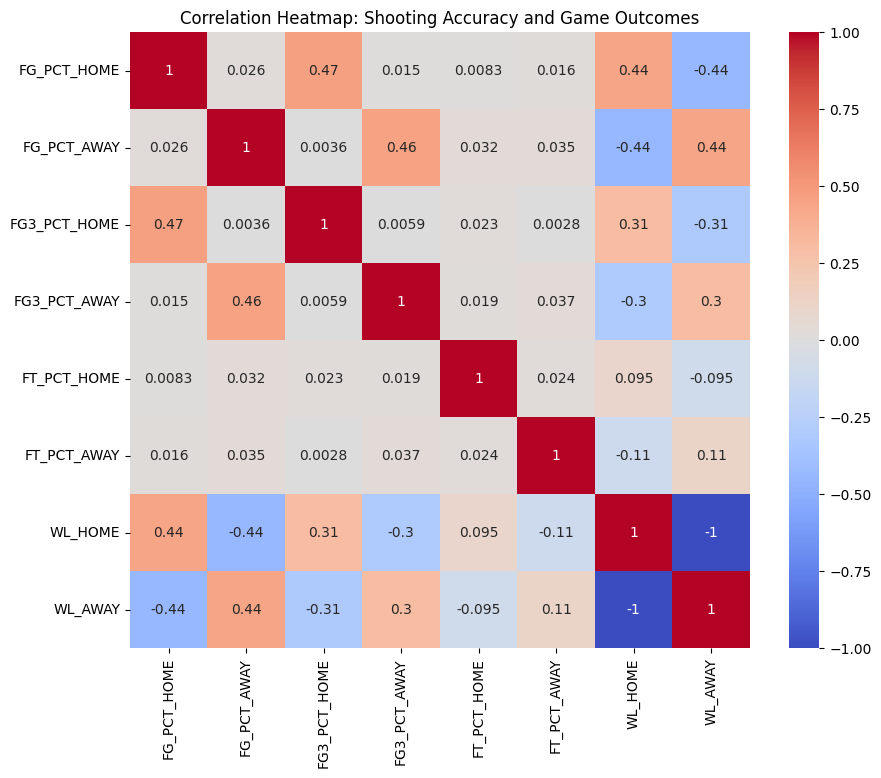

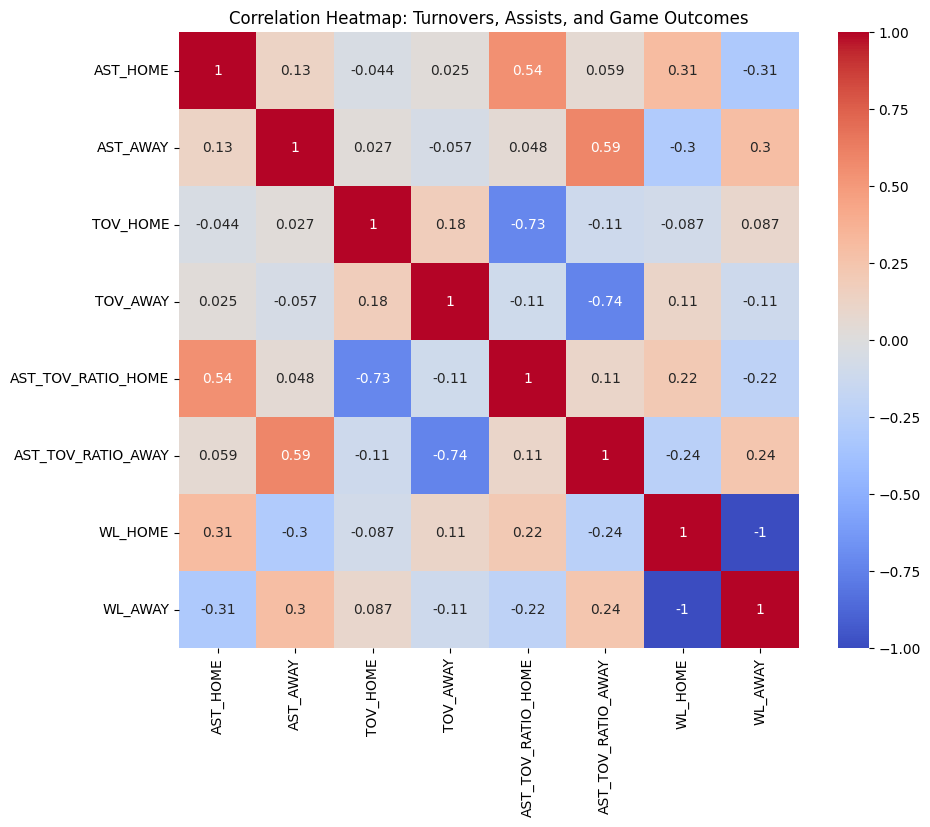

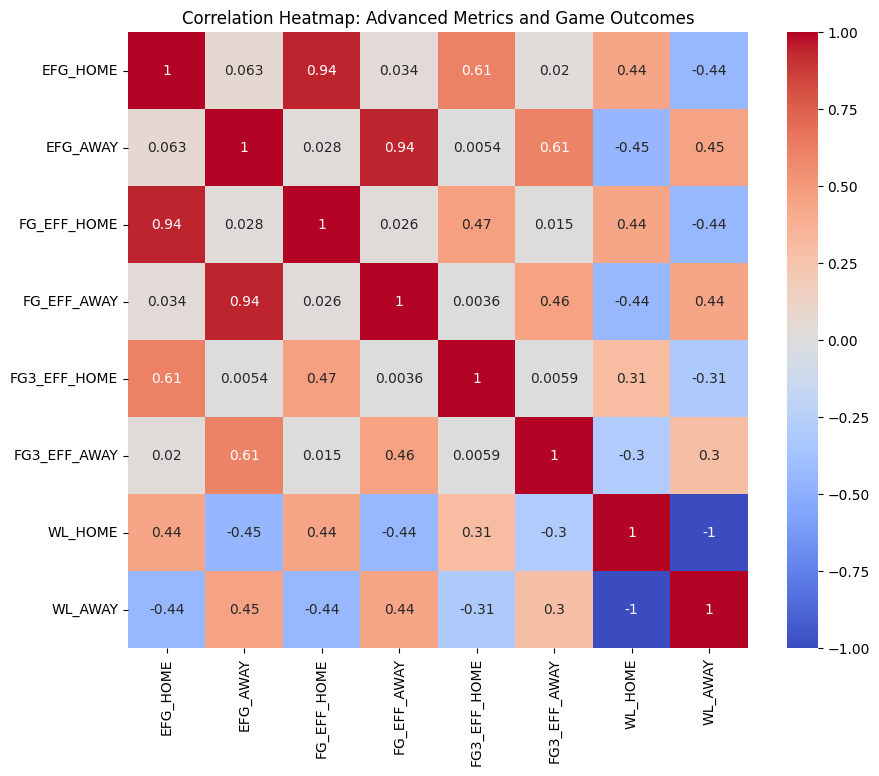

In [8]:
# convert 'W' and 'L' to numeric values
df['WL_HOME'] = df['WL_HOME'].map({'W': 1, 'L': 0})
df['WL_AWAY'] = df['WL_AWAY'].map({'W': 1, 'L': 0})

#correlation analysis for shooting accuracy 

shooting_metrics = ['FG_PCT_HOME', 'FG_PCT_AWAY', 'FG3_PCT_HOME', 'FG3_PCT_AWAY', 'FT_PCT_HOME', 'FT_PCT_AWAY', 'WL_HOME', 'WL_AWAY']
corr_shooting = df[shooting_metrics].corr()

#visualization 

plt.figure(figsize=(10,8))
sns.heatmap(corr_shooting, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Shooting Accuracy and Game Outcomes')
plt.show()

#correlation analysis for turnovers and assists

turnover_assists_metrics = ['AST_HOME', 'AST_AWAY', 'TOV_HOME', 'TOV_AWAY', 'AST_TOV_RATIO_HOME', 'AST_TOV_RATIO_AWAY', 'WL_HOME', 'WL_AWAY']
corr_turnover_assists = df[turnover_assists_metrics].corr()

#visualization

plt.figure(figsize=(10,8))
sns.heatmap(corr_turnover_assists, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Turnovers, Assists, and Game Outcomes')
plt.show()

# correlation Analysis for advanced metrics
advanced_metrics = ['EFG_HOME', 'EFG_AWAY', 'FG_EFF_HOME', 'FG_EFF_AWAY', 'FG3_EFF_HOME', 'FG3_EFF_AWAY', 'WL_HOME', 'WL_AWAY']
corr_advanced = df[advanced_metrics].corr()

# visualization
plt.figure(figsize=(10, 8))

sns.heatmap(corr_advanced, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Advanced Metrics and Game Outcomes')
plt.show()

## 3. Time Series Analysis @Mark

Given the dynamic nature of sports, where team performance can vary significantly from season to season, we analyzed the data across different time periods to capture any temporal effects on game outcomes. This analysis aimed to:

- Seasonal Trends: Observe how team performance metrics change over different seasons.
- Performance Variations: Identify any trends or patterns in performance metrics throughout the season.
- Rolling Averages: Use rolling averages to smooth out performance data and capture trends over time.

### 3.1. Seasonal Trends

To observe how team performance metrics change over different seasons, we can create multiple plots to visualize different aspects of performance:

#### 3.1.1 Average Points Scored Per Season

This plot shows the average points scored by nba team, home, and away teams for each season.

##### Home vs Away

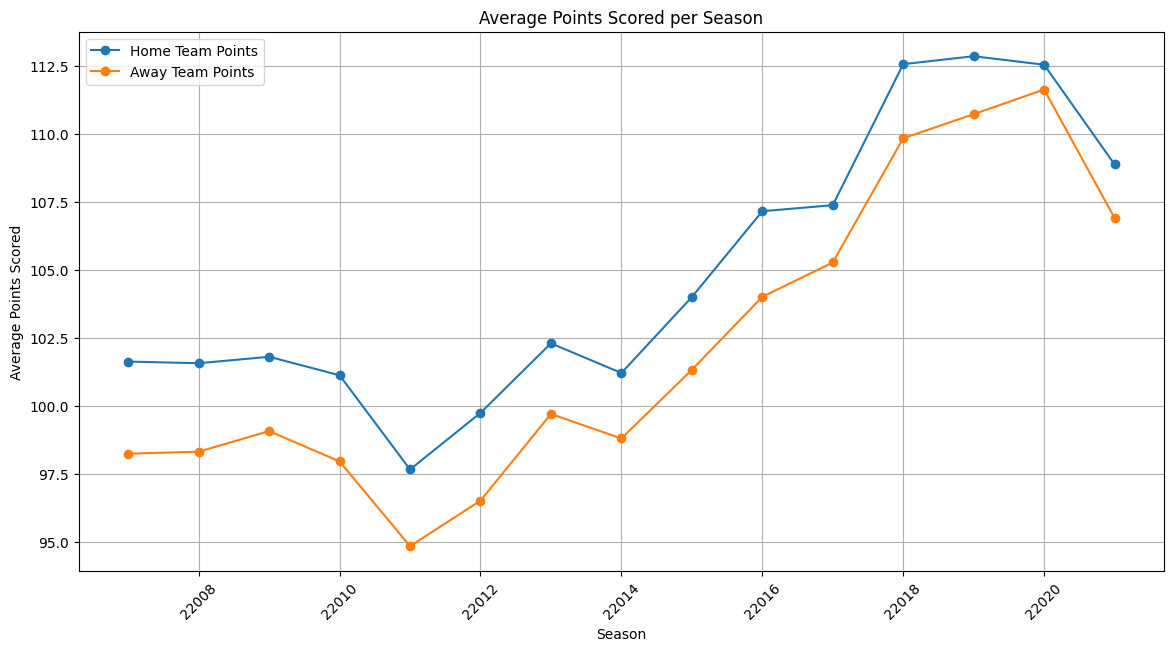

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'GAME_DATE' is a datetime type and 'SEASON_ID' is categorical or similar
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

# Group by season and calculate average points scored per game
seasonal_points = df.groupby('SEASON_ID').agg({
    'PTS_HOME': 'mean',
    'PTS_AWAY': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(seasonal_points['SEASON_ID'], seasonal_points['PTS_HOME'], marker='o', label='Home Team Points')
plt.plot(seasonal_points['SEASON_ID'], seasonal_points['PTS_AWAY'], marker='o', label='Away Team Points')
plt.title('Average Points Scored per Season')
plt.xlabel('Season')
plt.ylabel('Average Points Scored')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#### 3.1.2 Average Rebounds Per Season

This plot shows the average number of rebounds per game for the home and away teams across seasons.

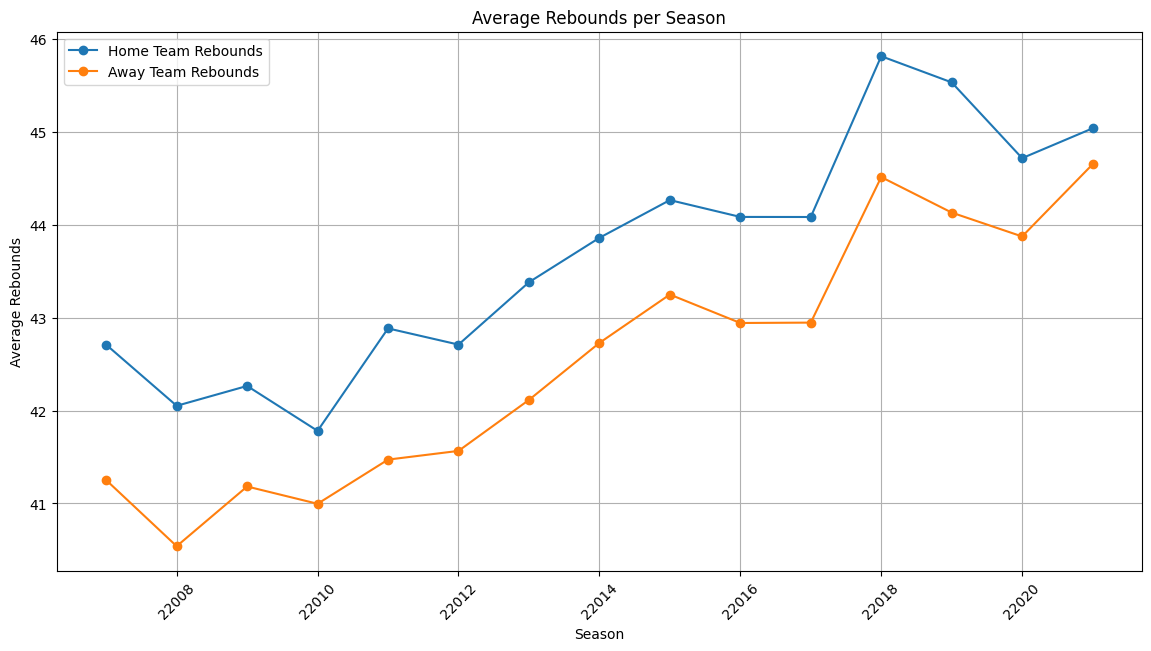

In [10]:
# Group by season and calculate average rebounds per game
seasonal_rebounds = df.groupby('SEASON_ID').agg({
    'REB_HOME': 'mean',
    'REB_AWAY': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(seasonal_rebounds['SEASON_ID'], seasonal_rebounds['REB_HOME'], marker='o', label='Home Team Rebounds')
plt.plot(seasonal_rebounds['SEASON_ID'], seasonal_rebounds['REB_AWAY'], marker='o', label='Away Team Rebounds')
plt.title('Average Rebounds per Season')
plt.xlabel('Season')
plt.ylabel('Average Rebounds')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#### 3.1.3 Average Field Goal Percentage Per Season

This plot displays the average field goal percentage for home and away teams across different seasons.

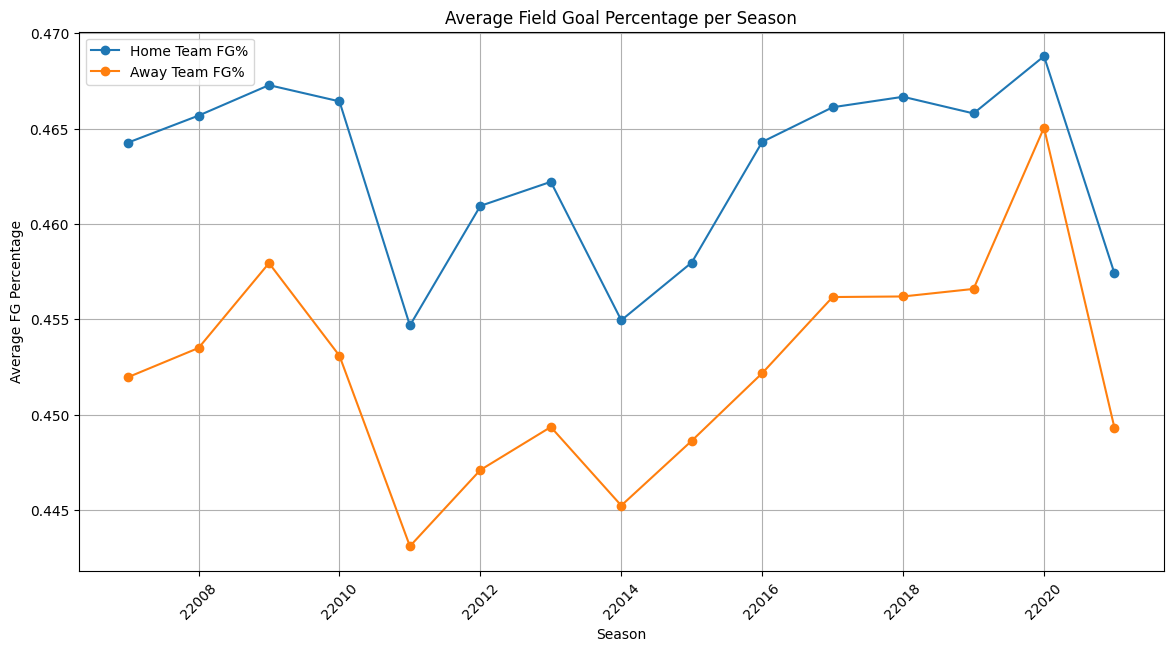

In [11]:
# Group by season and calculate average field goal percentage
seasonal_fg_pct = df.groupby('SEASON_ID').agg({
    'FG_PCT_HOME': 'mean',
    'FG_PCT_AWAY': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(seasonal_fg_pct['SEASON_ID'], seasonal_fg_pct['FG_PCT_HOME'], marker='o', label='Home Team FG%')
plt.plot(seasonal_fg_pct['SEASON_ID'], seasonal_fg_pct['FG_PCT_AWAY'], marker='o', label='Away Team FG%')
plt.title('Average Field Goal Percentage per Season')
plt.xlabel('Season')
plt.ylabel('Average FG Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

##### NBA Teams